In [16]:
from fastai import *
from fastai.vision import *
from IPython.display import Image
from glob import glob

In [17]:
path = Path('data/dataset_resized')
path

PosixPath('data/dataset_resized')

In [18]:
fn_paths = glob('data/dataset_resized_square/usr_*/*.tiff')
fn_paths.extend(glob('data/dataset_resized_square/usr_*/*.png'))
fn_paths_lst = list(map(Path, fn_paths))

In [19]:
# Regex to extract the classes
pat = r"(\d+)t\d+\.(tiff|png)$"

In [20]:
data = ImageDataBunch.from_name_re(path, fn_paths, pat, ds_tfms=get_transforms(), size=120, bs=32)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (66343 items)
x: ImageList
Image (3, 120, 120),Image (3, 120, 120),Image (3, 120, 120),Image (3, 120, 120),Image (3, 120, 120)
y: CategoryList
000,000,001,001,002
Path: data/dataset_resized;

Valid: LabelList (16585 items)
x: ImageList
Image (3, 120, 120),Image (3, 120, 120),Image (3, 120, 120),Image (3, 120, 120),Image (3, 120, 120)
y: CategoryList
102,121,078,045,027
Path: data/dataset_resized;

Test: None

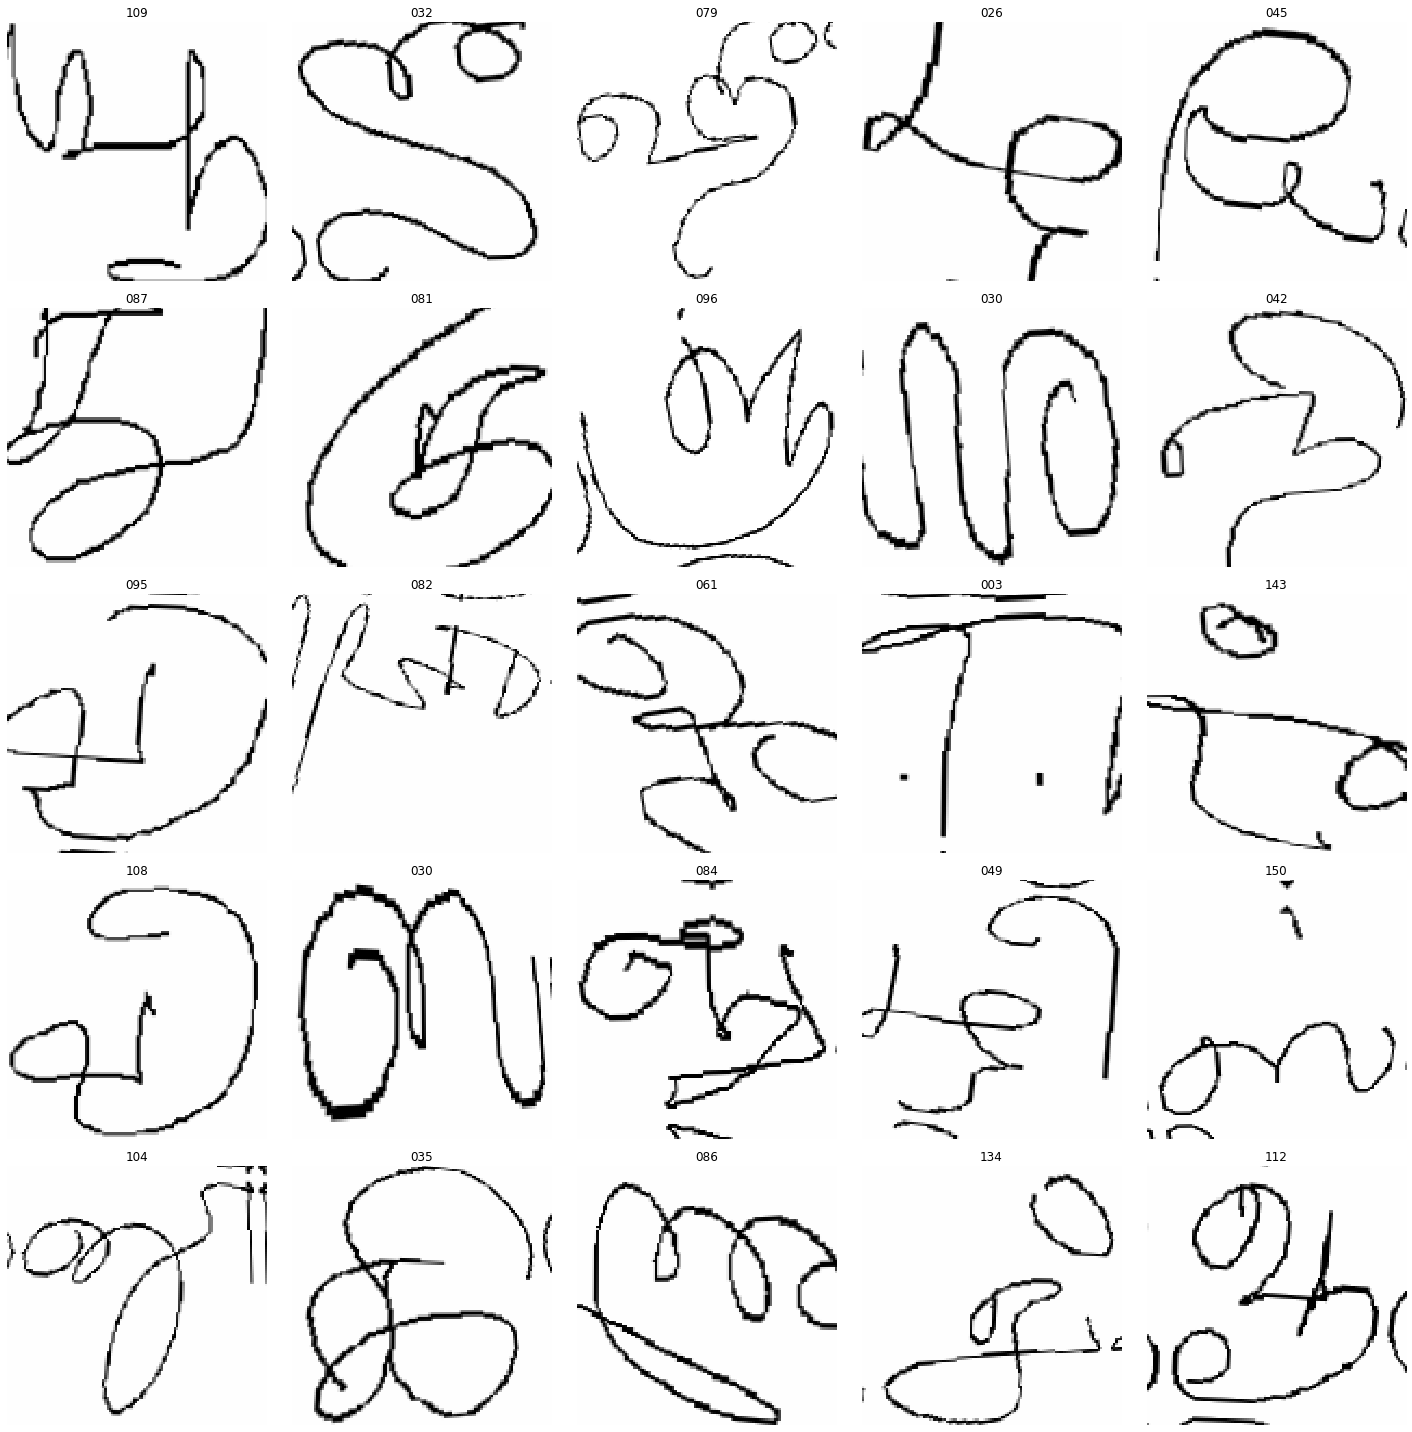

In [21]:
data.show_batch()

In [7]:
data.classes

['000',
 '001',
 '002',
 '003',
 '004',
 '005',
 '006',
 '007',
 '008',
 '009',
 '010',
 '011',
 '012',
 '013',
 '014',
 '015',
 '016',
 '017',
 '018',
 '019',
 '020',
 '021',
 '022',
 '023',
 '024',
 '025',
 '026',
 '027',
 '028',
 '029',
 '030',
 '031',
 '032',
 '033',
 '034',
 '035',
 '036',
 '037',
 '038',
 '039',
 '040',
 '041',
 '042',
 '043',
 '044',
 '045',
 '046',
 '047',
 '048',
 '049',
 '050',
 '051',
 '052',
 '053',
 '054',
 '055',
 '056',
 '057',
 '058',
 '059',
 '060',
 '061',
 '062',
 '063',
 '064',
 '065',
 '066',
 '067',
 '068',
 '069',
 '070',
 '071',
 '072',
 '073',
 '074',
 '075',
 '076',
 '077',
 '078',
 '079',
 '080',
 '081',
 '082',
 '083',
 '084',
 '085',
 '086',
 '087',
 '088',
 '089',
 '090',
 '091',
 '092',
 '093',
 '094',
 '095',
 '096',
 '097',
 '098',
 '099',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',


# Training

In [22]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [23]:
lr=0.01

In [24]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,1.242802,0.703643,0.786976,04:04
1,0.745869,0.384966,0.880555,04:09
2,0.502490,0.259989,0.919867,04:11
3,0.376871,0.197480,0.936027,04:12
4,0.302228,0.180675,0.941574,04:17


In [25]:
learn.save('stage-1')

In [26]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (66343 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
000,001,001,002,002
Path: data/tamil_dataset_offline;

Valid: LabelList (16585 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
037,148,128,117,051
Path: data/tamil_dataset_offline;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runnin

# Unfreezing, Fine-Tuning

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.92E-06
Min loss divided by 10: 1.10E-07


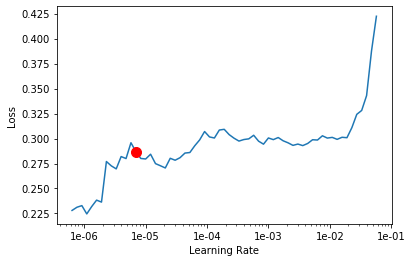

In [29]:
learn.recorder.plot(suggestion=True)
# learn.recorder.plot?

In [30]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-04, lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.539130,0.317683,0.897196,05:40
1,0.405956,0.225525,0.926017,05:55
2,0.262287,0.165592,0.947965,05:55
3,0.197185,0.133194,0.958276,05:56
4,0.158299,0.123576,0.960145,05:56


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 3.63E-06


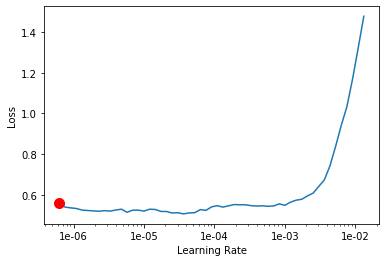

In [19]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [31]:
learn.save('stage-2')

In [33]:
learn.export()

In [35]:
interp = ClassificationInterpretation.from_learner(learn)

In [36]:
interp.most_confused(min_val=2)

[('125', '079', 42),
 ('126', '080', 31),
 ('128', '077', 25),
 ('123', '077', 24),
 ('122', '076', 21),
 ('124', '078', 20),
 ('127', '076', 18),
 ('129', '078', 17),
 ('131', '080', 17),
 ('130', '079', 16),
 ('127', '122', 15),
 ('130', '125', 13),
 ('128', '123', 12),
 ('129', '124', 12),
 ('131', '126', 11),
 ('076', '122', 10),
 ('080', '126', 9),
 ('009', '010', 8),
 ('114', '096', 8),
 ('029', '120', 7),
 ('010', '009', 6),
 ('066', '062', 5),
 ('077', '123', 5),
 ('095', '090', 5),
 ('101', '081', 5),
 ('110', '092', 5),
 ('025', '024', 4),
 ('079', '125', 4),
 ('106', '115', 4),
 ('113', '108', 4),
 ('125', '130', 4),
 ('126', '131', 4),
 ('139', '148', 4),
 ('006', '118', 3),
 ('007', '006', 3),
 ('027', '029', 3),
 ('047', '048', 3),
 ('078', '129', 3),
 ('088', '013', 3),
 ('088', '097', 3),
 ('098', '097', 3),
 ('106', '102', 3),
 ('117', '006', 3),
 ('122', '127', 3),
 ('145', '144', 3),
 ('006', '000', 2),
 ('006', '117', 2),
 ('013', '030', 2),
 ('025', '062', 2),
 ('0

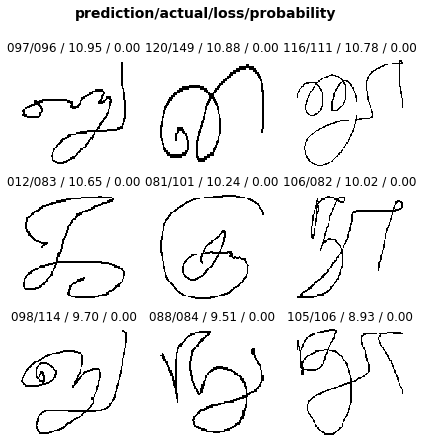

In [42]:
interp.plot_top_losses(9, figsize=(7,7))